**Importing Libraries**

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# import warnings
# warnings.filterwarnings("ignore")

In [174]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**DATA CLEANING**

In [175]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

<p>The Unnamed: 32 column is full of null values so it is not contributing to dataset we need to remove the column</p>

In [177]:
df = df.drop(['id', 'Unnamed: 32'], axis=1)
df.isnull().sum().sum()

0

In [178]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

**VISUALIZING THE DATA**

In [179]:
df.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


<AxesSubplot: >

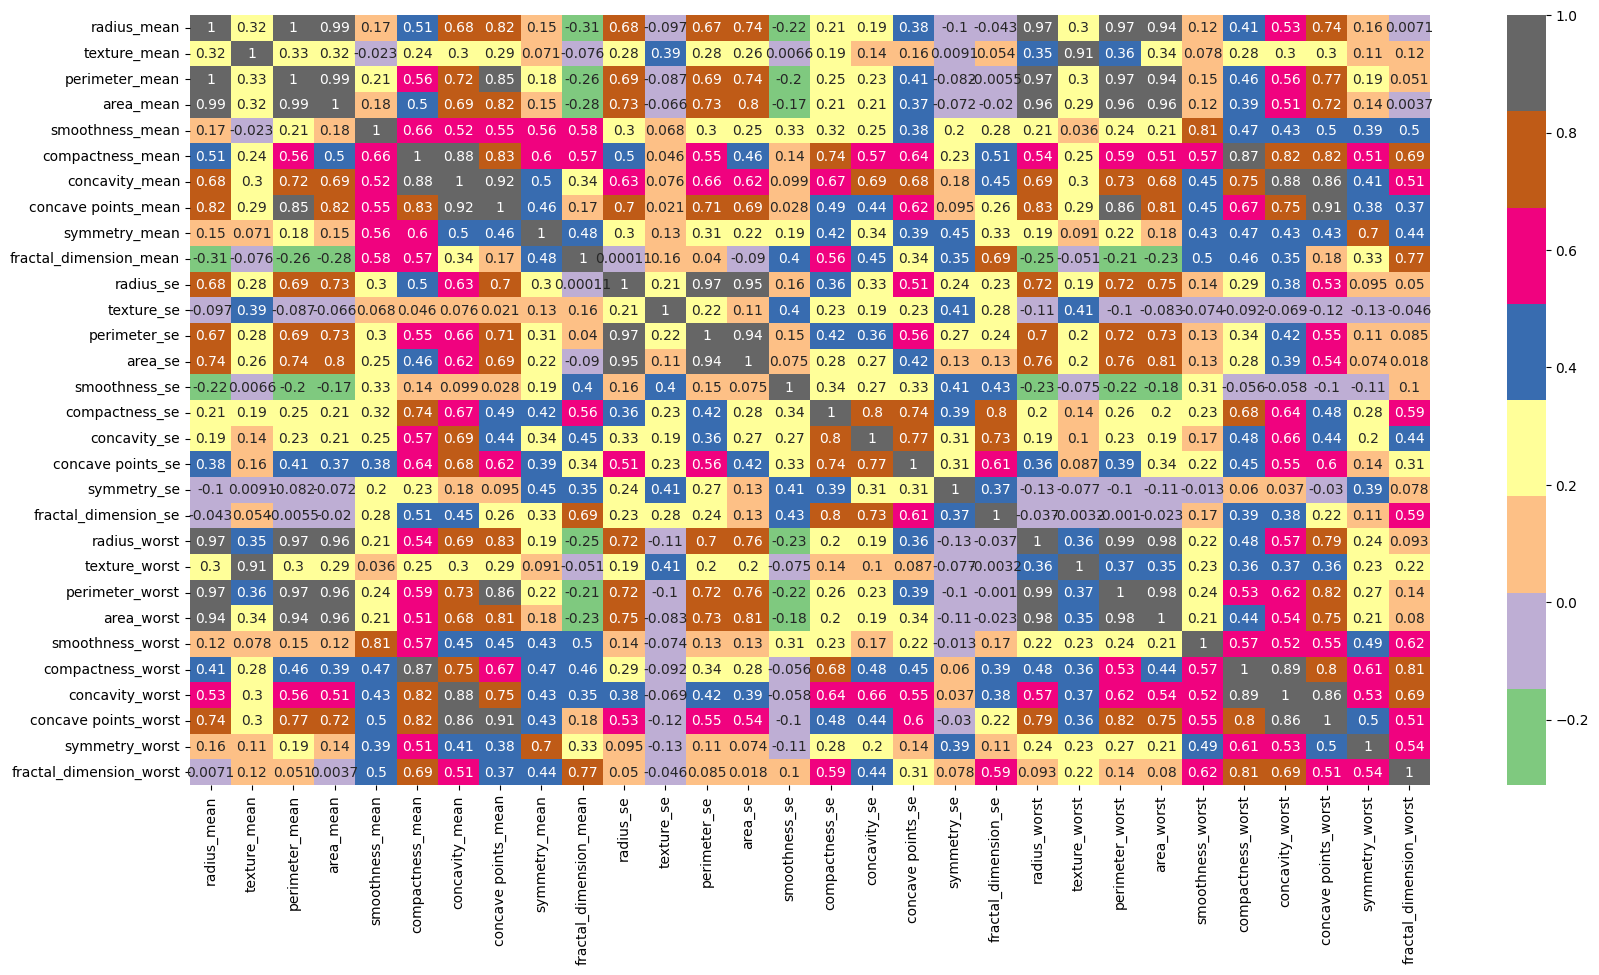

In [180]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot= True, cmap='Accent')

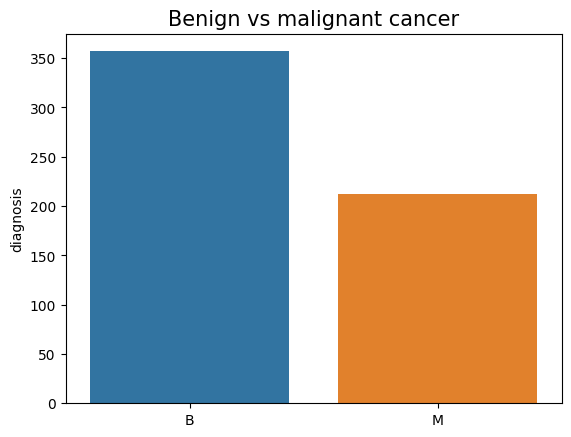

In [181]:
sns.barplot(x=df.diagnosis.value_counts().index, y=df.diagnosis.value_counts())
plt.title('Benign vs malignant cancer', fontsize=15)
plt.show()

Text(0.5, 1.0, 'Radius vs Texture mean of sample')

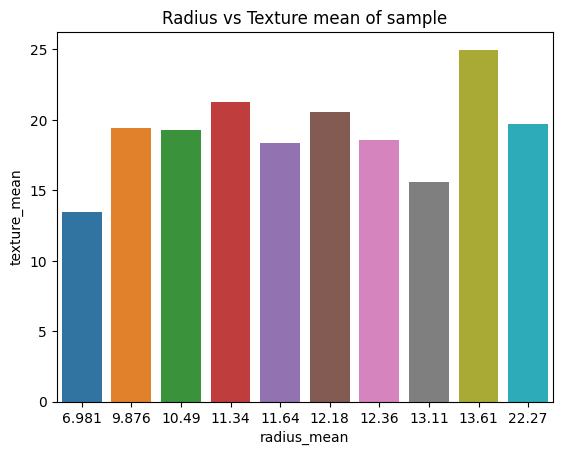

In [182]:
sns.barplot(x='radius_mean', y='texture_mean', data=df[100:110])
plt.title("Radius vs Texture mean of sample")

In [183]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [184]:
# Pairplot for mean data columns
mean_columns = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
# sns.pairplot(df[mean_columns], hue='diagnosis', palette='Accent')

In [185]:
# worst_columns paitplot 
worst_col = ['diagnosis', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
# sns.pairplot(df[worst_col], hue='diagnosis', palette='Accent_r')

**TRAINING AND TESTING DATASET**

In [186]:
X = df.drop('diagnosis',axis=1)
Y = df['diagnosis'].replace({'B': 1, 'M': 0})


In [187]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))

In [188]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)


In [189]:
print("Count of Training samples: ", len(x_train) )
print("Count of Testing samples: ", len(x_test) )

Count of Training samples:  455
Count of Testing samples:  114


**Logistic Regression**

In [190]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [191]:
y_pred = model.predict(x_test)
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


,Actual,Predicted
172,0,0
553,1,1
374,1,1
370,0,0
419,1,1
...,...,...
188,1,1
429,1,1
399,1,1
323,0,0


In [192]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Classification Report: ", classification_report(y_test,y_pred))
print("Confusion matrix: \n", confusion_matrix(y_test, y_pred))
print("Training Score: ", model.score(x_train, y_train)*100)
print("Accuracy Score: ",accuracy_score(y_test, y_pred)*100)

Classification Report:                precision    recall  f1-score   support

           0       0.95      0.95      0.95        39
           1       0.97      0.97      0.97        75

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

Confusion matrix: 
 [[37  2]
 [ 2 73]]
Training Score:  98.46153846153847
Accuracy Score:  96.49122807017544


**Decision Tree Algorithm**

In [193]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=6, random_state=10)
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=10)

In [194]:
y_pred = tree.predict(x_test)
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


,Actual,Predicted
172,0,0
553,1,1
374,1,1
370,0,0
419,1,1
...,...,...
188,1,1
429,1,1
399,1,1
323,0,0


In [195]:
print("Classification Report for Decision Tree: ",classification_report(y_test, y_pred))
print("Confusion Matrix for Decision Tree Model: \n", confusion_matrix(y_test, y_pred))
print("Training Score for Decision Tree Model: ", tree.score(x_train, y_train)*100)
print("Accuracy Score of Decision Tree Model: ", accuracy_score(y_test, y_pred)*100)

Classification Report for Decision Tree:                precision    recall  f1-score   support

           0       0.92      0.92      0.92        39
           1       0.96      0.96      0.96        75

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Confusion Matrix for Decision Tree Model: 
 [[36  3]
 [ 3 72]]
Training Score for Decision Tree Model:  99.12087912087912
Accuracy Score of Decision Tree Model:  94.73684210526315


**Support Vector Machines (SVM)**

In [196]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [197]:
y_pred = svc.predict(x_test)
print("Classification Report for SVC Model: ", classification_report(y_test, y_pred))
print("Confusion Matrix for SVC Model: \n", confusion_matrix(y_test, y_pred))
print("Training Score of SVC Model: ", svc.score(x_train, y_train)*100)
print("Accuracy Score of SVC Model is: ", accuracy_score(y_test, y_pred)*100)

Classification Report for SVC Model:                precision    recall  f1-score   support

           0       0.93      1.00      0.96        39
           1       1.00      0.96      0.98        75

    accuracy                           0.97       114
   macro avg       0.96      0.98      0.97       114
weighted avg       0.98      0.97      0.97       114

Confusion Matrix for SVC Model: 
 [[39  0]
 [ 3 72]]
Training Score of SVC Model:  98.46153846153847
Accuracy Score of SVC Model is:  97.36842105263158


**XGBoost Classifier**

In [198]:
from xgboost import XGBClassifier
xgb = XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10)
xgb.fit(x_train, y_train)

[21:37:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=5, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=0,
              num_parallel_tree=1, objective='reg:linear', ...)

In [199]:
y_pred = xgb.predict(x_test)
print("Classificaiton Report for XGBoost Model: ", classification_report(y_test, y_pred))
print("Confusion Matrix for XGBoost Model: \n",confusion_matrix(y_test, y_pred) )
print("Training Score of XGBoost Model: ", xgb.score(x_train, y_train)*100)
print("Accuracy Score of XGBoost Model: ", accuracy_score(y_test, y_pred)*100)

Classificaiton Report for XGBoost Model:                precision    recall  f1-score   support

           0       0.95      0.95      0.95        39
           1       0.97      0.97      0.97        75

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

Confusion Matrix for XGBoost Model: 
 [[37  2]
 [ 2 73]]
Training Score of XGBoost Model:  96.48351648351648
Accuracy Score of XGBoost Model:  96.49122807017544


**KNearest Neighbours Algorithms**

In [200]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [201]:
y_pred = knn.predict(x_test)

In [202]:
print("Classification Report for KNN: ", classification_report(y_test, y_pred))
print("Confusion Matrix for KNN model: \n", confusion_matrix(y_test, y_pred))
print("Training Accuracy of KNN Model is: ", knn.score(x_train, y_train)*100)
print("Accuracy score of knn Model: ", accuracy_score(y_test, y_pred)*100)

Classification Report for KNN:                precision    recall  f1-score   support

           0       0.95      0.97      0.96        39
           1       0.99      0.97      0.98        75

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix for KNN model: 
 [[38  1]
 [ 2 73]]
Training Accuracy of KNN Model is:  97.58241758241758
Accuracy score of knn Model:  97.36842105263158
